## Observations and Insights 

1. Capomulin and Ramicane performed the best of all the drug regimens when compared to the placebo when looking at mean tumor volume and the total number of mice that lasted throughout the entire 45-day study (See Summary Statistics and Bar Charts).

2. The Propriva regimen resulted in a decrease in mean tumor volume when compared to the placebo, however Propriva had the fewest number of mice survive the 45-day study, suggesting an underlying toxicity of Propriva at the concentration given for the study (See Bar Charts).

3. A positive correlation exists for average mouse weight and average tumor volume for mice in the Capomulin regimen group (See correlation and regression analysis).


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results, on="Mouse ID", how="outer")
mouse_study

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0        k403     Ramicane  Male          21          16          0   
1        k403     Ramicane  Male          21          16          5   
2        k403     Ramicane  Male          21          16         10   
3        k403     Ramicane  Male          21          16         15   
4        k403     Ramicane  Male          21          16         20   
...       ...          ...   ...         ...         ...        ...   
1888     z969     Naftisol  Male           9          30         25   
1889     z969     Naftisol  Male           9          30         30   
1890     z969     Naftisol  Male           9          30         35   
1891     z969     Naftisol  Male           9          30         40   
1892     z969     Naftisol  Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
0              45.000000                 0  
1              38.825898                 0  
2              35.014271                 1  
3              34.223992                 1  
4              32.997729                 1  
...                  ...               ...  
1888           63.145652                 2  
1889           65.841013                 3  
1890           69.176246                 4  
1891           70.314904                 4  
1892           73.867845                 4  

[1893 rows x 8 columns]

In [2]:
#check data
#check for null values
pd.isnull(mouse_study).sum()

Mouse ID              0
Drug Regimen          0
Sex                   0
Age_months            0
Weight (g)            0
Timepoint             0
Tumor Volume (mm3)    0
Metastatic Sites      0
dtype: int64

In [3]:
# Checking the number of mice in the DataFrame.
mouse_study["Mouse ID"].count()

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = mouse_study[mouse_study.duplicated(["Mouse ID","Timepoint"])]
print("Duplicate Rows based on 2 columns are:", duplicates_df, sep='\n')

Duplicate Rows based on 2 columns are:
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
909     g989     Propriva  Female          21          26          0   
911     g989     Propriva  Female          21          26          5   
913     g989     Propriva  Female          21          26         10   
915     g989     Propriva  Female          21          26         15   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
909           45.000000                 0  
911           47.570392                 0  
913           49.880528                 0  
915           53.442020                 0  
917           54.657650                 1  


In [5]:
mouse = mouse_study.loc[mouse_study["Mouse ID"] == "g989",:]
mouse

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study = mouse_study.drop(mouse_study.index[908:921])

In [8]:
# number of mice in the cleaned dataset
cleaned_mouse_study["Mouse ID"].count()

1880

In [9]:
#save the cleaned dataset
cleaned_mouse_study.to_csv("Data/merged_data_cleaned.csv", index = False, header = True)

## Summary Statistics

In [10]:
cleaned_mouse_study["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [11]:
#SEM = Capomulin_SD/Capomulin_count **(1/2)  check to make sure st.sem returns the same value when SEM is calculated manually
#Placebo_count = Placebo_df["Tumor Volume (mm3)"].count()

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Placebo_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Placebo", :]
Placebo_avg = Placebo_df["Tumor Volume (mm3)"].mean()
Placebo_median = Placebo_df["Tumor Volume (mm3)"].median()
Placebo_var = Placebo_df["Tumor Volume (mm3)"].var()
Placebo_SD = Placebo_df["Tumor Volume (mm3)"].std()
Placebo_sem = st.sem(Placebo_df["Tumor Volume (mm3)"])

Capomulin_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Capomulin", :]
Capomulin_avg = Capomulin_df["Tumor Volume (mm3)"].mean()
Capomulin_median = Capomulin_df["Tumor Volume (mm3)"].median()
Capomulin_var = Capomulin_df["Tumor Volume (mm3)"].var()
Capomulin_SD = Capomulin_df["Tumor Volume (mm3)"].std()
Capomulin_sem = st.sem(Capomulin_df["Tumor Volume (mm3)"])

Ceftamin_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Ceftamin", :]
Ceftamin_avg = Ceftamin_df["Tumor Volume (mm3)"].mean()
Ceftamin_median = Ceftamin_df["Tumor Volume (mm3)"].median()
Ceftamin_var = Ceftamin_df["Tumor Volume (mm3)"].var()
Ceftamin_SD = Ceftamin_df["Tumor Volume (mm3)"].std()
Ceftamin_sem = st.sem(Ceftamin_df["Tumor Volume (mm3)"])

Infubinol_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Infubinol", :]
Infubinol_avg = Infubinol_df["Tumor Volume (mm3)"].mean()
Infubinol_median = Infubinol_df["Tumor Volume (mm3)"].median()
Infubinol_var = Infubinol_df["Tumor Volume (mm3)"].var()
Infubinol_SD = Infubinol_df["Tumor Volume (mm3)"].std()
Infubinol_sem = st.sem(Infubinol_df["Tumor Volume (mm3)"])

Ketapril_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Ketapril", :]
Ketapril_avg = Ketapril_df["Tumor Volume (mm3)"].mean()
Ketapril_median = Ketapril_df["Tumor Volume (mm3)"].median()
Ketapril_var = Ketapril_df["Tumor Volume (mm3)"].var()
Ketapril_SD = Ketapril_df["Tumor Volume (mm3)"].std()
Ketapril_sem = st.sem(Ketapril_df["Tumor Volume (mm3)"])

Naftisol_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Naftisol", :]
Naftisol_avg = Naftisol_df["Tumor Volume (mm3)"].mean()
Naftisol_median = Naftisol_df["Tumor Volume (mm3)"].median()
Naftisol_var = Naftisol_df["Tumor Volume (mm3)"].var()
Naftisol_SD = Naftisol_df["Tumor Volume (mm3)"].std()
Naftisol_sem = st.sem(Naftisol_df["Tumor Volume (mm3)"])

Propriva_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Propriva", :]
Propriva_avg = Propriva_df["Tumor Volume (mm3)"].mean()
Propriva_median = Propriva_df["Tumor Volume (mm3)"].median()
Propriva_var = Propriva_df["Tumor Volume (mm3)"].var()
Propriva_SD = Propriva_df["Tumor Volume (mm3)"].std()
Propriva_sem = st.sem(Propriva_df["Tumor Volume (mm3)"])

Ramicane_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Ramicane", :]
Ramicane_avg = Ramicane_df["Tumor Volume (mm3)"].mean()
Ramicane_median = Ramicane_df["Tumor Volume (mm3)"].median()
Ramicane_var = Ramicane_df["Tumor Volume (mm3)"].var()
Ramicane_SD = Ramicane_df["Tumor Volume (mm3)"].std()
Ramicane_sem = st.sem(Ramicane_df["Tumor Volume (mm3)"])

Stelasyn_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Stelasyn", :]
Stelasyn_avg = Stelasyn_df["Tumor Volume (mm3)"].mean()
Stelasyn_median = Stelasyn_df["Tumor Volume (mm3)"].median()
Stelasyn_var = Stelasyn_df["Tumor Volume (mm3)"].var()
Stelasyn_SD = Stelasyn_df["Tumor Volume (mm3)"].std()
Stelasyn_sem = st.sem(Stelasyn_df["Tumor Volume (mm3)"])

Zoniferol_df = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Zoniferol", :]
Zoniferol_avg = Zoniferol_df["Tumor Volume (mm3)"].mean()
Zoniferol_median = Zoniferol_df["Tumor Volume (mm3)"].median()
Zoniferol_var = Zoniferol_df["Tumor Volume (mm3)"].var()
Zoniferol_SD = Zoniferol_df["Tumor Volume (mm3)"].std()
Zoniferol_sem = st.sem(Zoniferol_df["Tumor Volume (mm3)"])

# This method is the most straightforward, creating multiple series and putting them all together at the end.

In [36]:
#create dictionary for the summary df
dictionary = {"Drug Regimen": ["Placebo","Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Propriva","Ramicane","Stelasyn","Zoniferol"],
            "Tumor Volume Mean": [Placebo_avg, Capomulin_avg, Ceftamin_avg, Infubinol_avg, Ketapril_avg, Naftisol_avg, Propriva_avg, Ramicane_avg, Stelasyn_avg, Zoniferol_avg],
            "Tumor Volume Median": [Placebo_median, Capomulin_median, Ceftamin_median, Infubinol_median, Ketapril_median, Naftisol_median, Propriva_median, Ramicane_median, Stelasyn_median, Zoniferol_median],
            "Tumor Volume Variance": [Placebo_var, Capomulin_var, Ceftamin_var, Infubinol_var, Ketapril_var, Naftisol_var, Propriva_var, Ramicane_var, Stelasyn_var, Zoniferol_var],
            "Tumor Volume Std.Dev.": [Placebo_SD, Capomulin_SD, Ceftamin_SD, Infubinol_SD, Ketapril_SD, Naftisol_SD, Propriva_SD, Ramicane_SD, Stelasyn_SD, Zoniferol_SD],
            "Tumor Volume SEM": [Placebo_sem, Capomulin_sem, Ceftamin_sem, Infubinol_sem, Ketapril_sem, Naftisol_sem, Propriva_sem, Ramicane_sem, Stelasyn_sem, Zoniferol_sem]}

tumor_summary_df = pd.DataFrame(dictionary)
tumor_summary_df.sort_values(by=["Drug Regimen"])


Drug Regimen  Tumor Volume Mean  Tumor Volume Median  Tumor Volume Variance  \
1    Capomulin          40.675741            41.557809              24.947764   
2     Ceftamin          52.591172            51.776157              39.290177   
3    Infubinol          52.884795            51.820584              43.128684   
4     Ketapril          55.235638            53.698743              68.553577   
5     Naftisol          54.331565            52.509285              66.173479   
0      Placebo          54.033581            52.288934              61.168083   
6     Propriva          52.320930            50.446266              43.852013   
7     Ramicane          40.216745            40.673236              23.486704   
8     Stelasyn          54.233149            52.431737              59.450562   
9    Zoniferol          53.236507            51.818479              48.533355   

   Tumor Volume Std.Dev.  Tumor Volume SEM  
1               4.994774          0.329346  
2               6.268188          0.469821  
3               6.567243          0.492236  
4               8.279709          0.603860  
5               8.134708          0.596466  
0               7.821003          0.581331  
6               6.622085          0.544332  
7               4.846308          0.320955  
8               7.710419          0.573111  
9               6.966589          0.516398

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#using groupby

drug_groups = cleaned_mouse_study.groupby(["Drug Regimen"])

tumor_avg = drug_groups["Tumor Volume (mm3)"].mean()
tumor_median = drug_groups["Tumor Volume (mm3)"].median()
tumor_var = drug_groups["Tumor Volume (mm3)"].var()
tumor_SD = drug_groups["Tumor Volume (mm3)"].std()
tumor_sem = drug_groups["Tumor Volume (mm3)"].sem()

tumor_summary_grouped_df = pd.DataFrame({"Tumor Volume Mean": tumor_avg,
                            "Tumor Volume Median": tumor_median,
                            "Tumor Volume Variance": tumor_var,
                            "Tumor Volume Std.Dev.": tumor_SD,
                            "Tumor Volume SEM": tumor_sem})


tumor_summary_grouped_df


Tumor Volume Mean  Tumor Volume Median  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std.Dev.  Tumor Volume SEM  
Drug Regimen                                           
Capomulin                  4.994774          0.329346  
Ceftamin                   6.268188          0.469821  
Infubinol                  6.567243          0.492236  
Ketapril                   8.279709          0.603860  
Naftisol                   8.134708          0.596466  
Placebo                    7.821003          0.581331  
Propriva                   6.622085          0.544332  
Ramicane                   4.846308          0.320955  
Stelasyn                   7.710419          0.573111  
Zoniferol                  6.966589          0.516398

## Bar Plots

In [15]:
mice_count = drug_groups["Mouse ID"].count()
tumor_summary_grouped_df["Number of Mice"] = mice_count
tumor_summary_grouped_df

Tumor Volume Mean  Tumor Volume Median  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std.Dev.  Tumor Volume SEM  Number of Mice  
Drug Regimen                                                           
Capomulin                  4.994774          0.329346             230  
Ceftamin                   6.268188          0.469821             178  
Infubinol                  6.567243          0.492236             178  
Ketapril                   8.279709          0.603860             188  
Naftisol                   8.134708          0.596466             186  
Placebo                    7.821003          0.581331             181  
Propriva                   6.622085          0.544332             148  
Ramicane                   4.846308          0.320955             228  
Stelasyn                   7.710419          0.573111             181  
Zoniferol                  6.966589          0.516398             182

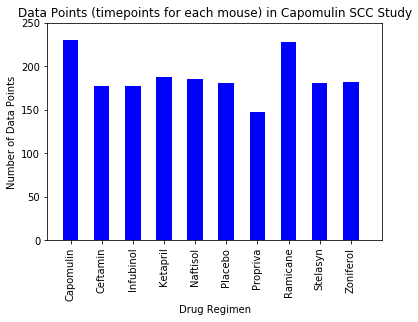

In [16]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
mouse_summary_df = tumor_summary_grouped_df[["Number of Mice"]]
mouse_bar = mouse_summary_df.plot(kind = "bar", title = "Data Points (timepoints for each mouse) in Capomulin SCC Study", legend = "", color = "blue")

x_axis = np.arange(len(tumor_summary_grouped_df))
mouse_bar.set_ylabel("Number of Data Points")
mouse_bar.set_xlim(-0.75, len(x_axis))
mouse_bar.set_ylim(0, 250)
plt.show()

In [17]:
tumor_summary_group2 = tumor_summary_grouped_df.reset_index()

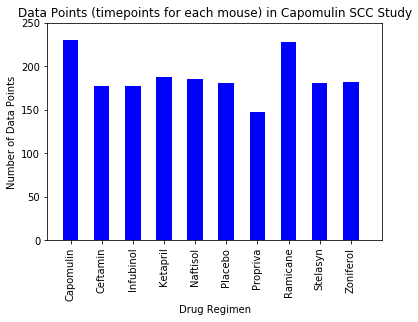

In [18]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
x_axis = np.arange(len(tumor_summary_group2))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, tumor_summary_group2["Number of Mice"], align="center", width = 0.5, color = "blue", alpha = 1)
plt.xticks(tick_locations, tumor_summary_group2["Drug Regimen"], rotation="vertical")

plt.title("Data Points (timepoints for each mouse) in Capomulin SCC Study")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, 250)
plt.show()

## Pie Plots

In [19]:
#create dataframe of unique mouse IDs keeping the last value
unique_IDs = cleaned_mouse_study.drop_duplicates(subset = "Mouse ID", keep = "last", inplace = False)

unique_IDs
unique_IDs["Sex"].value_counts()

Male      125
Female    123
Name: Sex, dtype: int64

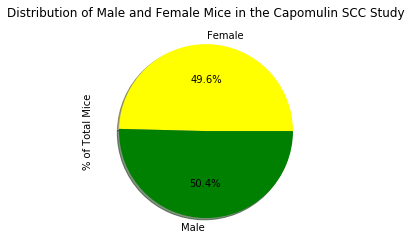

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_group = unique_IDs.groupby(["Sex"])
gender_group_sum = gender_group["Mouse ID"].count()
colors = ["Yellow", "Green"]

gender_pie = gender_group_sum.plot(kind = "pie", y = gender_group_sum, colors = colors, autopct="%1.1f%%", 
                                   title = "Distribution of Male and Female Mice in the Capomulin SCC Study", shadow=True, startangle=0)
gender_pie.set_ylabel("% of Total Mice")
plt.show()

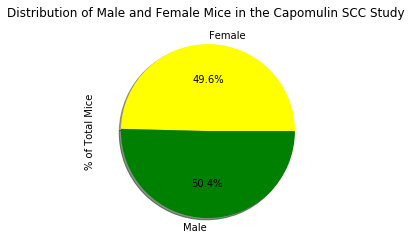

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#labels
genders = ["Female", "Male"]
#data
Male_count = len(unique_IDs.loc[cleaned_mouse_study["Sex"] == "Male"])
Female_count = len(unique_IDs.loc[cleaned_mouse_study["Sex"] == "Female"])
data = [Female_count, Male_count]

colors = ["Yellow", "Green"]

#piechart
plt.pie(data, labels=genders, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Distribution of Male and Female Mice in the Capomulin SCC Study ")
plt.ylabel("% of Total Mice")

plt.show()



## Quartiles, Outliers and Boxplots

In [22]:
#check the counts for the timepoints - timepoint = 0 is initial tumor volume, so these mice have no final tumor volume
unique_IDs["Timepoint"].value_counts()

45    130
30     17
10     16
5      15
40     12
25     12
15     12
0      12
35     11
20     11
Name: Timepoint, dtype: int64

In [23]:
#create dataframe exlcuding timpoint = 0
cleaned_unique = unique_IDs.loc[unique_IDs["Timepoint"] > 0, :]
#and sort to verify removal of timepoint = 0
unique_sorted = cleaned_unique.sort_values("Timepoint")
unique_sorted

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
1218     n630     Propriva  Female          15          29          5   
1205     m756    Infubinol    Male          19          30          5   
669      c326    Infubinol  Female          18          25          5   
449      w678     Ramicane  Female           5          24          5   
1616     v339    Infubinol    Male          20          26          5   
...       ...          ...     ...         ...         ...        ...   
800      e476    Infubinol    Male          23          26         45   
810      e584     Naftisol    Male           9          27         45   
834      f345    Infubinol    Male          23          26         45   
679      c402     Stelasyn  Female           1          27         45   
1892     z969     Naftisol    Male           9          30         45   

      Tumor Volume (mm3)  Metastatic Sites  
1218           46.099100                 0  
1205           47.010364                 1  
669            36.321346                 0  
449            43.166373                 0  
1616           46.250112                 0  
...                  ...               ...  
800            62.435404                 1  
810            68.359777                 4  
834            60.918767                 1  
679            74.040390                 3  
1892           73.867845                 4  

[236 rows x 8 columns]

In [24]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Final tumor volume corresponds to last timepoint recorded for each mouse
#remove mouse IDs with only a 0 timepoint as they only have an intial tumor volume
#4 most promising treatment regimens are: Capomulin, Ramicane, Infubinol, Ceftamin

#Capomulin
Cap_unique = unique_sorted.loc[unique_sorted["Drug Regimen"] == "Capomulin",:]
Cap_t_vol = Cap_unique["Tumor Volume (mm3)"]
Cap_quartiles = Cap_t_vol.quantile([.25,.5,.75])
Cap_LQ = Cap_quartiles[0.25]
Cap_UQ = Cap_quartiles[0.75]
Cap_iqr = Cap_UQ-Cap_LQ
Cap_lower_bound = round(Cap_LQ - (1.5*Cap_iqr),2)
Cap_upper_bound = round(Cap_UQ + (1.5*Cap_iqr),2)

#Ramicane
Ram_unique = unique_sorted.loc[unique_sorted["Drug Regimen"] == "Ramicane",:]
Ram_t_vol = Ramicane_df["Tumor Volume (mm3)"]
Ram_quartiles = Ram_t_vol.quantile([.25,.5,.75])
Ram_LQ = Ram_quartiles[0.25]
Ram_UQ = Ram_quartiles[0.75]
Ram_iqr = Ram_UQ-Ram_LQ
Ram_lower_bound = round(Ram_LQ - (1.5*Ram_iqr),2)
Ram_upper_bound = round(Ram_UQ + (1.5*Ram_iqr),2)

#Infubinol
Inf_unique = unique_sorted.loc[unique_sorted["Drug Regimen"] == "Infubinol",:]
Inf_t_vol =Infubinol_df["Tumor Volume (mm3)"]
Inf_quartiles = Inf_t_vol.quantile([.25,.5,.75])
Inf_LQ = Inf_quartiles[0.25]
Inf_UQ = Inf_quartiles[0.75]
Inf_iqr = Inf_UQ-Inf_LQ
Inf_lower_bound = round(Inf_LQ - (1.5*Inf_iqr),2)
Inf_upper_bound = round(Inf_UQ + (1.5*Inf_iqr),2)

#Ceftamin
Inf_unique = unique_sorted.loc[unique_sorted["Drug Regimen"] == "Ceftamin",:]
Cef_t_vol = Ceftamin_df["Tumor Volume (mm3)"]
Cef_quartiles = Cef_t_vol.quantile([.25,.5,.75])
Cef_LQ = Cef_quartiles[0.25]
Cef_UQ = Cef_quartiles[0.75]
Cef_iqr = Cef_UQ-Cef_LQ
Cef_lower_bound = round(Cef_LQ - (1.5*Cef_iqr),2)
Cef_upper_bound = round(Cef_UQ + (1.5*Cef_iqr),2)

print(f"Values below {Cap_lower_bound} could be outliers for the Capomulin treatment regimen.")
print(f"Values above {Cap_upper_bound} could be outliers for the Capomulin treatment regimen.\n")

print(f"Values below {Ram_lower_bound} could be outliers for the Ramicane treatment regimen.")
print(f"Values above {Ram_upper_bound} could be outliers for the Ramicane treatment regimen.\n")

print(f"Values below {Inf_lower_bound} could be outliers for the Infubinol treatment regimen.")
print(f"Values above {Inf_upper_bound} could be outliers for the Infubinol treatment regimen.\n")

print(f"Values below {Cef_lower_bound} could be outliers for the Ceftamin treatment regimen.")
print(f"Values above {Cef_upper_bound} could be outliers for the Ceftamin treatment regimen.\n")

Values below 20.7 could be outliers for the Capomulin treatment regimen.
Values above 51.83 could be outliers for the Capomulin treatment regimen.

Values below 24.19 could be outliers for the Ramicane treatment regimen.
Values above 57.49 could be outliers for the Ramicane treatment regimen.

Values below 32.31 could be outliers for the Infubinol treatment regimen.
Values above 72.32 could be outliers for the Infubinol treatment regimen.

Values below 32.82 could be outliers for the Ceftamin treatment regimen.
Values above 71.19 could be outliers for the Ceftamin treatment regimen.



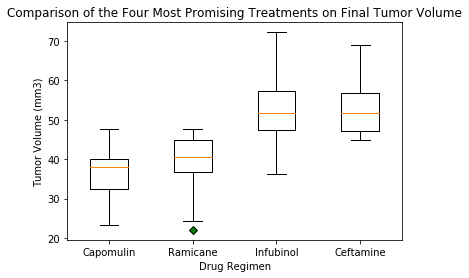

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_data = [Cap_t_vol, Ram_t_vol, Inf_t_vol,Cef_t_vol]
green_diamond = dict(markerfacecolor='g', marker='D')
x_label = ["Capomulin", "Ramicane", "Infubinol", "Ceftamine"]

fig, ax1 = plt.subplots()
ax1.set_title('Comparison of the Four Most Promising Treatments on Final Tumor Volume')
ax1.boxplot(box_data, labels = x_label, flierprops=green_diamond)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

plt.show()

## Line and Scatter Plots

In [43]:
#get mouse ids for capumulin
mouse_id = cleaned_mouse_study.loc[cleaned_mouse_study["Drug Regimen"] == "Capomulin",:]
mouse_id["Mouse ID"].value_counts()


r944    10
i557    10
v923    10
i738    10
j119    10
b128    10
y793    10
b742    10
m601    10
w914    10
x401    10
s710    10
l897    10
m957    10
r554    10
t565    10
g316    10
g288    10
s185    10
u364    10
l509    10
j246     8
f966     5
r157     4
w150     3
Name: Mouse ID, dtype: int64

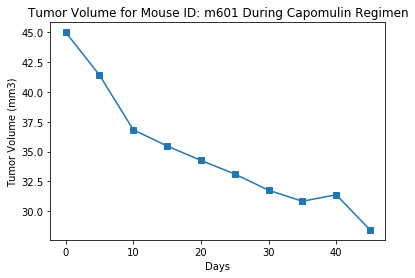

In [27]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#select a mouse in Capomulin regimen
mouse = "m601"
#create dataframe for select mouse
mouse_df = mouse_id.loc[mouse_id["Mouse ID"] == mouse, ["Timepoint", "Tumor Volume (mm3)"]]
mouse_df
#create line plot
x_axis = mouse_df["Timepoint"]
tumor_vol = mouse_df["Tumor Volume (mm3)"]

plt.plot(x_axis, tumor_vol, marker = "s")
plt.title(f"Tumor Volume for Mouse ID: {mouse} During Capomulin Regimen")
plt.xlabel("Days")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [53]:
#get average tumor volume per mouse
mouse_group = mouse_id.groupby('Mouse ID')
avg_tumor_vol = mouse_group["Tumor Volume (mm3)"].mean()
avg_weight = mouse_group["Weight (g)"].mean()

weight_v_tumor_df = pd.DataFrame({"Avg Weight (g)": avg_weight, "Avg Tumor Volume (mm3)": avg_tumor_vol})
weight_v_tumor_df

Avg Weight (g)  Avg Tumor Volume (mm3)
Mouse ID                                        
b128                  22               41.963636
b742                  21               40.083699
f966                  17               36.505973
g288                  19               41.990097
g316                  22               44.613344
i557                  24               44.805810
i738                  20               39.141053
j119                  23               44.465236
j246                  21               43.216925
l509                  21               44.434474
l897                  19               42.507261
m601                  17               34.847470
m957                  19               39.049816
r157                  25               45.798970
r554                  17               36.509212
r944                  25               43.367364
s185                  17               34.559143
s710                  23               42.803733
t565                  17               39.328725
u364                  17               39.887495
v923                  21               41.581595
w150                  23               41.384825
w914                  21               41.352452
x401                  15               36.182040
y793                  17               38.506829

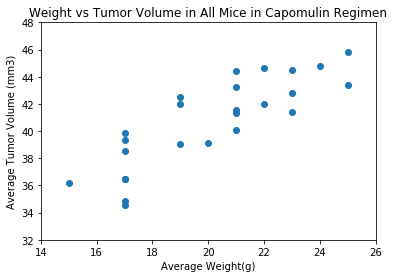

In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

plt.scatter(weight_v_tumor_df.iloc[:,0], weight_v_tumor_df.iloc[:,1])
plt.xlabel("Average Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume in All Mice in Capomulin Regimen")
plt.xlim(14,26)
plt.ylim(32,48)
plt.show()

## Correlation and Regression

In [59]:
from scipy.stats import linregress

In [60]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#correlation coefficient
weight = weight_v_tumor_df.iloc[:,0]
tumor_vol = weight_v_tumor_df.iloc[:,1]
correlation = st.pearsonr(weight,tumor_vol)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


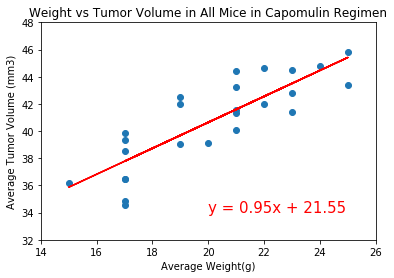

The r-squared is: 0.709


In [63]:
#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tumor_vol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,tumor_vol)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,34),fontsize=15,color="red")
plt.xlabel("Average Weight(g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume in All Mice in Capomulin Regimen")
plt.xlim(14,26)
plt.ylim(32,48)

plt.show()
print(f"The r-squared is: {round(rvalue**2,3)}")